# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="https://drive.google.com/uc?id=1j4eZRrDDC_ayowY7oj2ymsRMphdE4Tuf" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="https://drive.google.com/uc?id=1xQC3f1RCcZxyVUbZ71T-e4HyRIJFF94C" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
### YOUR CODE HERE ###
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset into dataframe
file_path = '/content/drive/My Drive/Advanced Data Analytics Certificate/Activity Datasets/tiktok_dataset.csv'
data = pd.read_csv(file_path)

<img src="https://drive.google.com/uc?id=1kpRJdR0z6z3foENI0hyMdZ9duLvXZ8Ca" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


1. Outliers and extreme data values can significantly impact linear regression equations. After visualizing data, make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.
2. EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with data set means, medians, and other similar methods.
3. It's important to check for things like multicollinearity between predictor variables, as well to understand their distributions, as this will help you decide what statistical inferences can be made from the model and which ones cannot.
4. Additionally, it can be useful to engineer new features. For example, in this dataset you can create a new variable by extracting the length of String values from the `video_transcription_text` variable.

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [4]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [5]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [6]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

,0
#,int64
claim_status,object
video_id,int64
video_duration_sec,int64
video_transcription_text,object
verified_status,object
author_ban_status,object
video_view_count,float64
video_like_count,float64
video_share_count,float64


Get basic information about the dataset.

In [7]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [8]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
data.isna().sum()

,0
#,0
claim_status,298
video_id,0
video_duration_sec,0
video_transcription_text,298
verified_status,0
author_ban_status,0
video_view_count,298
video_like_count,298
video_share_count,298


In [10]:
# EXTRA
data['verified_status'].value_counts(normalize=True)

,proportion
verified_status,
not verified,0.936023
verified,0.063977


In [11]:
#data['claim_status'].value_counts(normalize=True)

In [12]:
# Drop rows with missing values
### YOUR CODE HERE ###
data = data.dropna(axis=0)

In [13]:
# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [14]:
# EXTRA
data['verified_status'].value_counts(normalize=True)

,proportion
verified_status,
not verified,0.93712
verified,0.06288


Check for and handle duplicates.

In [15]:
# Check for duplicates
### YOUR CODE HERE ###
data.duplicated().sum()

0

Check for and handle outliers.

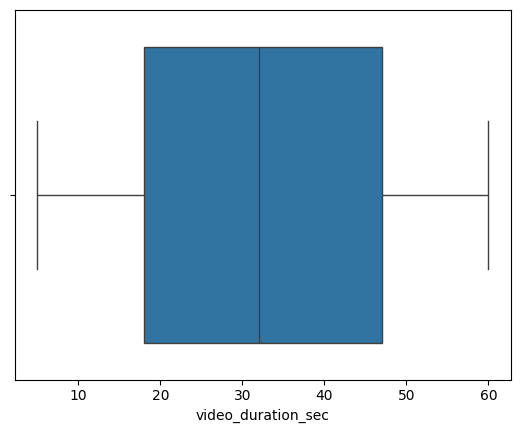

In [16]:
# Create a boxplot to visualize distribution of `video_duration_sec`
### YOUR CODE HERE ###
sns.boxplot(x=data['video_duration_sec'])
plt.show()

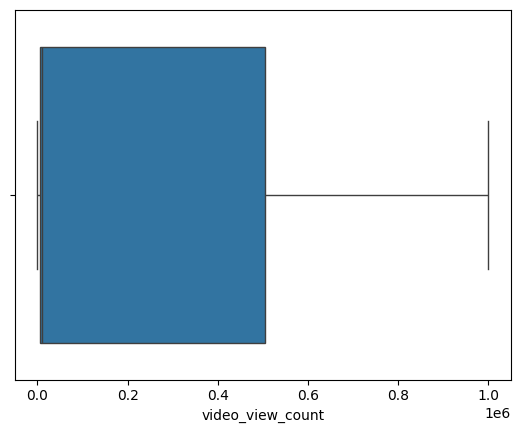

In [17]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###
sns.boxplot(x=data['video_view_count'])
plt.show()

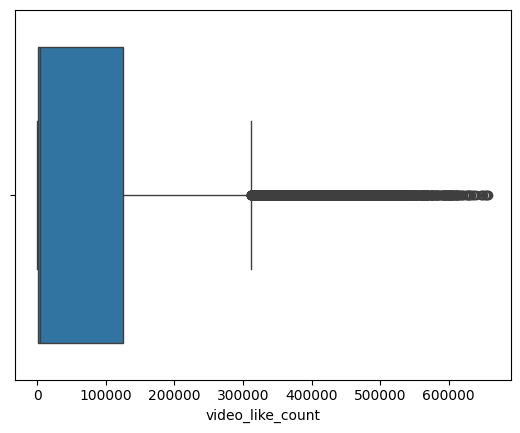

In [18]:
# Create a boxplot to visualize distribution of `video_like_count`
### YOUR CODE HERE ###
sns.boxplot(x=data['video_like_count'])
plt.show()

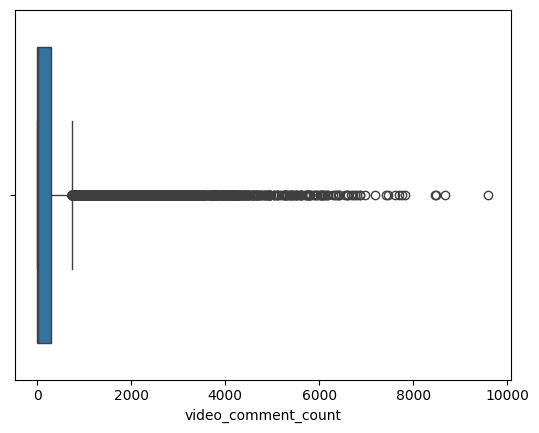

In [19]:
# Create a boxplot to visualize distribution of `video_comment_count`
### YOUR CODE HERE ###
sns.boxplot(x=data['video_comment_count'])
plt.show()

In [20]:
# Check for and handle outliers for video_like_count
### YOUR CODE HERE ###
# Calculate the IQR for `video_like_count`
'''
Q1 = data['video_like_count'].quantile(0.25)
Q3 = data['video_like_count'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers, replace default 1.5 with ?
lower_bound = Q1 - 2 * IQR
print("lower_bound:", lower_bound)
upper_bound = Q3 + 2 * IQR
print("upper_bound:", upper_bound)

# Filter the DataFrame to remove outliers
rows_before = data.shape[0]
data = data[(data['video_like_count'] >= lower_bound) & (data['video_like_count'] <= upper_bound)]
rows_after = data.shape[0]
rows_removed = rows_before - rows_after
print(f"Number of rows removed: {rows_removed}")

# Create a boxplot to visualize the distribution of `video_like_count` after handling outliers
sns.boxplot(x=data['video_like_count'])
plt.show()
'''


'\nQ1 = data[\'video_like_count\'].quantile(0.25)\nQ3 = data[\'video_like_count\'].quantile(0.75)\nIQR = Q3 - Q1\n\n# Define the lower and upper bounds for outliers, replace default 1.5 with ?\nlower_bound = Q1 - 2 * IQR\nprint("lower_bound:", lower_bound)\nupper_bound = Q3 + 2 * IQR\nprint("upper_bound:", upper_bound)\n\n# Filter the DataFrame to remove outliers\nrows_before = data.shape[0]\ndata = data[(data[\'video_like_count\'] >= lower_bound) & (data[\'video_like_count\'] <= upper_bound)]\nrows_after = data.shape[0]\nrows_removed = rows_before - rows_after\nprint(f"Number of rows removed: {rows_removed}")\n\n# Create a boxplot to visualize the distribution of `video_like_count` after handling outliers\nsns.boxplot(x=data[\'video_like_count\'])\nplt.show()\n'

Check class balance.

In [21]:
# Check class balance for video_comment_count (actually verified_status?)
### YOUR CODE HERE ###
data['verified_status'].value_counts(normalize=True)

,proportion
verified_status,
not verified,0.93712
verified,0.06288


Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [24]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
### YOUR CODE HERE ###
# Separate majority and minority classes
'''
majority_class = data[data['verified_status'] == "not verified"]
minority_class = data[data['verified_status'] == "verified"]

# Upsample the minority class (which is "verified")
### YOUR CODE HERE ###
from sklearn.utils import resample
minority_upsampled = resample(minority_class,
                             replace=True,
                             n_samples=len(majority_class),
                             random_state=0)

# Combine majority class with upsampled minority class
### YOUR CODE HERE ###
data_upsampled = pd.concat([majority_class, minority_upsampled])

# Display new class counts
### YOUR CODE HERE ###
data_upsampled['verified_status'].value_counts()
'''
data_upsampled = data


Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [25]:
# prompt: Get the average video_transcription_text length for videos posted by verified accounts and the average video_transcription_text length fro videos posted by unverified accounts.

# Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.
print("Average video transcription text length verified accounts:", data_upsampled[data_upsampled['verified_status'] == 'verified']['video_transcription_text'].str.len().mean())
print("Average video transcription text length unverified accounts:", data_upsampled[data_upsampled['verified_status'] == 'not verified']['video_transcription_text'].str.len().mean())


Average video transcription text length verified accounts: 84.50916666666667
Average video transcription text length unverified accounts: 89.40114068441065


In [26]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
### YOUR CODE HERE ###
print("Average video transcription text length claims:", data_upsampled[data_upsampled['claim_status'] == 'claim']['video_transcription_text'].str.len().mean())
print("Average video transcription text length opinions:", data_upsampled[data_upsampled['claim_status'] == 'opinion']['video_transcription_text'].str.len().mean())


Average video transcription text length claims: 95.37697751873439
Average video transcription text length opinions: 82.72256226255804


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [27]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
data_upsampled['text_length'] = data_upsampled['video_transcription_text'].str.len()

In [28]:
# Display first few rows of dataframe after adding new column
### YOUR CODE HERE ###
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

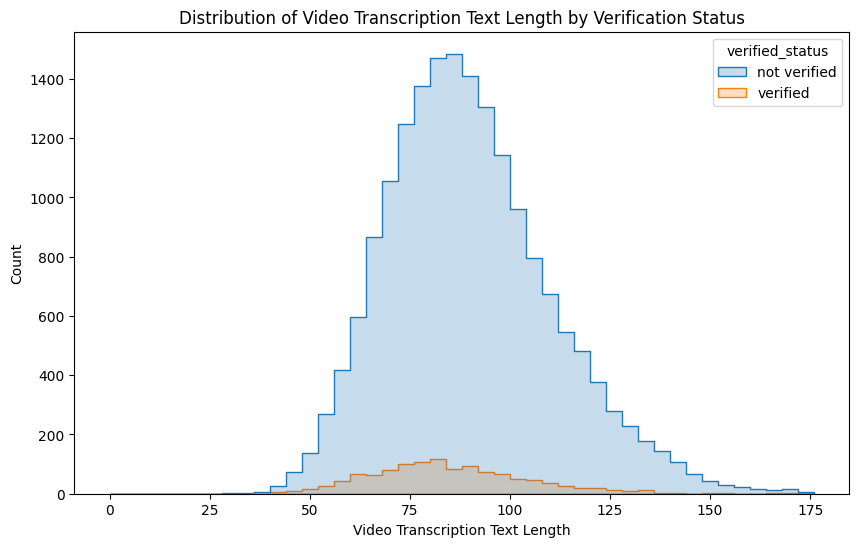

In [29]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
### YOUR CODE HERE ###

plt.figure(figsize=(10, 6))
sns.histplot(data=data_upsampled, x='text_length', bins=range(0, 180, 4), hue='verified_status', element='step')
#sns.histplot(data=data_upsampled, x='text_length')
plt.title('Distribution of Video Transcription Text Length by Verification Status')
plt.xlabel('Video Transcription Text Length')
plt.ylabel('Count')
plt.show()


### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  int64  
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
 12  text_length               19084 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 2.0+ MB


In [31]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [32]:
# prompt: drop columns "#", "video_id", and "video_transcription_text"

data = data.drop(["#", "video_id", "video_transcription_text"], axis=1)
data.head()


,claim_status,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,claim,59,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,claim,32,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,claim,31,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,claim,25,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,claim,19,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [33]:
# prompt: change column "claim_status" to type float64 with claim mapped to 1.0 and opinion mapped to 0.0.

claim_mapping = {"claim": 1.0, "opinion": 0.0}
data['claim_status'] = data['claim_status'].map(claim_mapping)
data['claim_status'] = data['claim_status'].astype('float64')


In [ ]:
data.head()

,claim_status,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1.0,59,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,1.0,32,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,1.0,31,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,1.0,25,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,1.0,19,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [34]:
# prompt: get unique values for column "verified_status"

data['verified_status'].unique()


array(['not verified', 'verified'], dtype=object)

In [35]:
# prompt: change column "verified_status" to type float64 with "verified" mapped to 1.0 and "not verified" mapped to 0.0.

verified_mapping = {"verified": 1.0, "not verified": 0.0}
data['verified_status'] = data['verified_status'].map(verified_mapping)
data['verified_status'] = data['verified_status'].astype('float64')
data.head()


,claim_status,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1.0,59,0.0,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,1.0,32,0.0,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,1.0,31,0.0,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,1.0,25,0.0,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,1.0,19,0.0,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [36]:
data['author_ban_status'].unique()

array(['under review', 'active', 'banned'], dtype=object)

In [37]:
# prompt: change column "author_ban_status" to type float64 with "banned" mapped to 2.0, "under review" to 1.0, and "active" mapped to 0.0.

author_mapping = {"banned": 2.0, "under review": 1.0, "active": 0.0}
data['author_ban_status'] = data['author_ban_status'].map(author_mapping)
data['author_ban_status'] = data['author_ban_status'].astype('float64')
data.head()


,claim_status,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1.0,59,0.0,1.0,343296.0,19425.0,241.0,1.0,0.0,97
1,1.0,32,0.0,0.0,140877.0,77355.0,19034.0,1161.0,684.0,107
2,1.0,31,0.0,0.0,902185.0,97690.0,2858.0,833.0,329.0,137
3,1.0,25,0.0,0.0,437506.0,239954.0,34812.0,1234.0,584.0,131
4,1.0,19,0.0,0.0,56167.0,34987.0,4110.0,547.0,152.0,128


In [38]:
# prompt: get info() for data

data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_status          19084 non-null  float64
 1   video_duration_sec    19084 non-null  int64  
 2   verified_status       19084 non-null  float64
 3   author_ban_status     19084 non-null  float64
 4   video_view_count      19084 non-null  float64
 5   video_like_count      19084 non-null  float64
 6   video_share_count     19084 non-null  float64
 7   video_download_count  19084 non-null  float64
 8   video_comment_count   19084 non-null  float64
 9   text_length           19084 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 1.6 MB


In [39]:
# prompt: change type for video_duration_sec and text_length to float64

data['video_duration_sec'] = data['video_duration_sec'].astype('float64')
data['text_length'] = data['text_length'].astype('float64')
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_status          19084 non-null  float64
 1   video_duration_sec    19084 non-null  float64
 2   verified_status       19084 non-null  float64
 3   author_ban_status     19084 non-null  float64
 4   video_view_count      19084 non-null  float64
 5   video_like_count      19084 non-null  float64
 6   video_share_count     19084 non-null  float64
 7   video_download_count  19084 non-null  float64
 8   video_comment_count   19084 non-null  float64
 9   text_length           19084 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [40]:
# Code a correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
corr = data.corr(numeric_only=True)
corr

,claim_status,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
claim_status,1.000000,0.003914,-0.170600,0.308037,0.768170,0.619399,0.512067,0.513217,0.430487,0.305928
video_duration_sec,0.003914,1.000000,-0.010358,-0.011210,0.008481,0.011567,0.011560,0.013078,0.000615,-0.001580
verified_status,-0.170600,-0.010358,1.000000,-0.059583,-0.130983,-0.104779,-0.082022,-0.089343,-0.069466,-0.057419
author_ban_status,0.308037,-0.011210,-0.059583,1.000000,0.241638,0.203563,0.166228,0.168697,0.136068,0.096777
video_view_count,0.768170,0.008481,-0.130983,0.241638,1.000000,0.804322,0.665635,0.664222,0.554172,0.230212
video_like_count,0.619399,0.011567,-0.104779,0.203563,0.804322,1.000000,0.825789,0.823554,0.687185,0.180193
video_share_count,0.512067,0.011560,-0.082022,0.166228,0.665635,0.825789,1.000000,0.679910,0.574632,0.147223
video_download_count,0.513217,0.013078,-0.089343,0.168697,0.664222,0.823554,0.679910,1.000000,0.832464,0.146382
video_comment_count,0.430487,0.000615,-0.069466,0.136068,0.554172,0.687185,0.574632,0.832464,1.000000,0.129659
text_length,0.305928,-0.001580,-0.057419,0.096777,0.230212,0.180193,0.147223,0.146382,0.129659,1.000000


Visualize a correlation heatmap of the data.

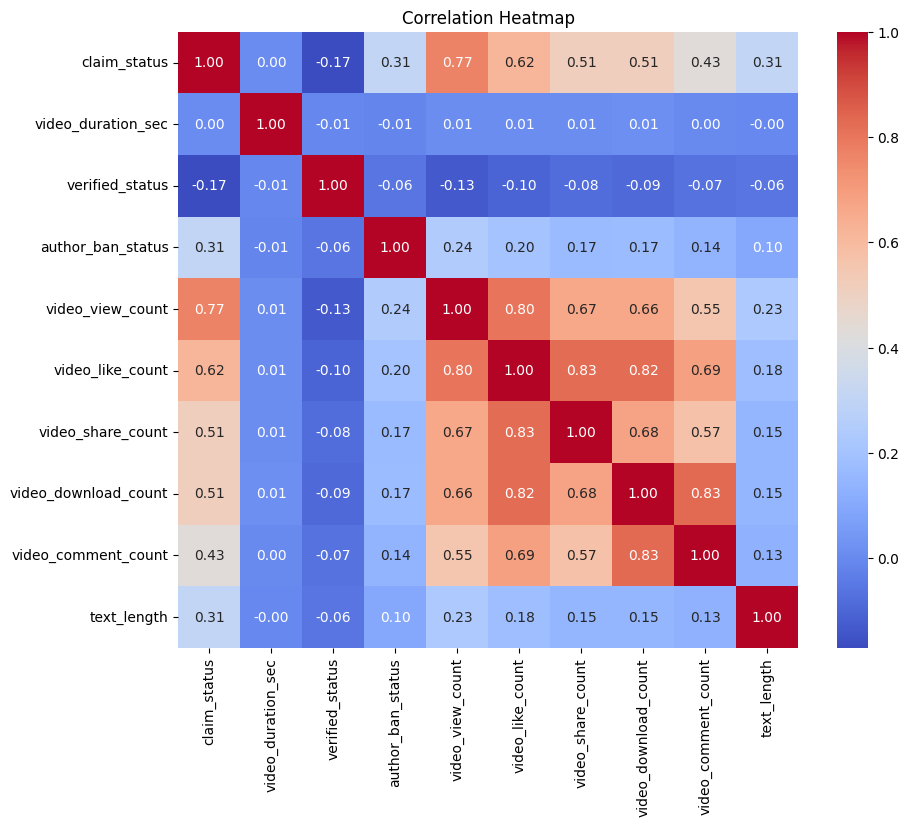

In [41]:
# Create a heatmap to visualize how correlated variables are
### YOUR CODE HERE ###
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?
* The following numeric variables appear to have fair amounts of correlation with each other:
    * video_view_count
    * video_like_count
    * video_share_count
    * video_download_count
    * video_comment_count

<img src="https://drive.google.com/uc?id=1xa68IrpTXu0KRFO49MEMiLaje8469nsk" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

In [42]:
# prompt: get describe for data

data.describe()


,claim_status,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
count,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,0.503458,32.423811,0.062880,0.279606,254708.558688,84304.636030,16735.248323,1049.429627,349.312146,89.093534
std,0.500001,16.226470,0.242753,0.610568,322893.280814,133420.546814,32036.174350,2004.299894,799.638865,20.682086
min,0.000000,5.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,31.000000
25%,0.000000,18.000000,0.000000,0.000000,4942.500000,810.750000,115.000000,7.000000,1.000000,75.000000
50%,1.000000,32.000000,0.000000,0.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000,87.000000
75%,1.000000,47.000000,0.000000,0.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000,101.000000
max,1.000000,60.000000,1.000000,2.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000,182.000000


In [43]:
# prompt: modify the column "video_view_count" to replace its values to log(value+1)

data['video_view_count'] = np.log(data['video_view_count'])
data['video_like_count'] = np.log(data['video_like_count'] + 1)
data['video_share_count'] = np.log(data['video_share_count'] + 1)
data['video_download_count'] = np.log(data['video_download_count'] + 1)
data['video_comment_count'] = np.log(data['video_comment_count'] + 1)


In [44]:
# prompt: describe data

data.describe()


,claim_status,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
count,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,0.503458,32.423811,0.062880,0.279606,10.522405,8.911212,7.023813,4.415229,3.148572,89.093534
std,0.500001,16.226470,0.242753,0.610568,2.510602,2.869102,2.973043,2.750466,2.668344,20.682086
min,0.000000,5.000000,0.000000,0.000000,2.995732,0.000000,0.000000,0.000000,0.000000,31.000000
25%,0.000000,18.000000,0.000000,0.000000,8.505627,6.699192,4.753590,2.079442,0.693147,75.000000
50%,1.000000,32.000000,0.000000,0.000000,9.205780,8.132853,6.576470,3.850148,2.302585,87.000000
75%,1.000000,47.000000,0.000000,0.000000,13.130980,11.736237,9.810440,7.053802,5.680173,101.000000
max,1.000000,60.000000,1.000000,2.000000,13.815328,13.396703,12.453444,9.615472,9.169518,182.000000


In [45]:
# prompt: get the correlation for data's columns

corr_log = data.corr(numeric_only=True)
corr_log


,claim_status,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
claim_status,1.000000,0.003914,-0.170600,0.308037,0.919010,0.873151,0.832446,0.847727,0.838849,0.305928
video_duration_sec,0.003914,1.000000,-0.010358,-0.011210,0.001242,0.002794,0.003591,0.005701,-0.004572,-0.001580
verified_status,-0.170600,-0.010358,1.000000,-0.059583,-0.157129,-0.145957,-0.136770,-0.145478,-0.142737,-0.057419
author_ban_status,0.308037,-0.011210,-0.059583,1.000000,0.287386,0.274836,0.262558,0.265995,0.261130,0.096777
video_view_count,0.919010,0.001242,-0.157129,0.287386,1.000000,0.938684,0.892167,0.896322,0.867667,0.281899
video_like_count,0.873151,0.002794,-0.145957,0.274836,0.938684,1.000000,0.947557,0.945031,0.901338,0.263378
video_share_count,0.832446,0.003591,-0.136770,0.262558,0.892167,0.947557,1.000000,0.898047,0.858990,0.248195
video_download_count,0.847727,0.005701,-0.145478,0.265995,0.896322,0.945031,0.898047,1.000000,0.953443,0.256509
video_comment_count,0.838849,-0.004572,-0.142737,0.261130,0.867667,0.901338,0.858990,0.953443,1.000000,0.255564
text_length,0.305928,-0.001580,-0.057419,0.096777,0.281899,0.263378,0.248195,0.256509,0.255564,1.000000


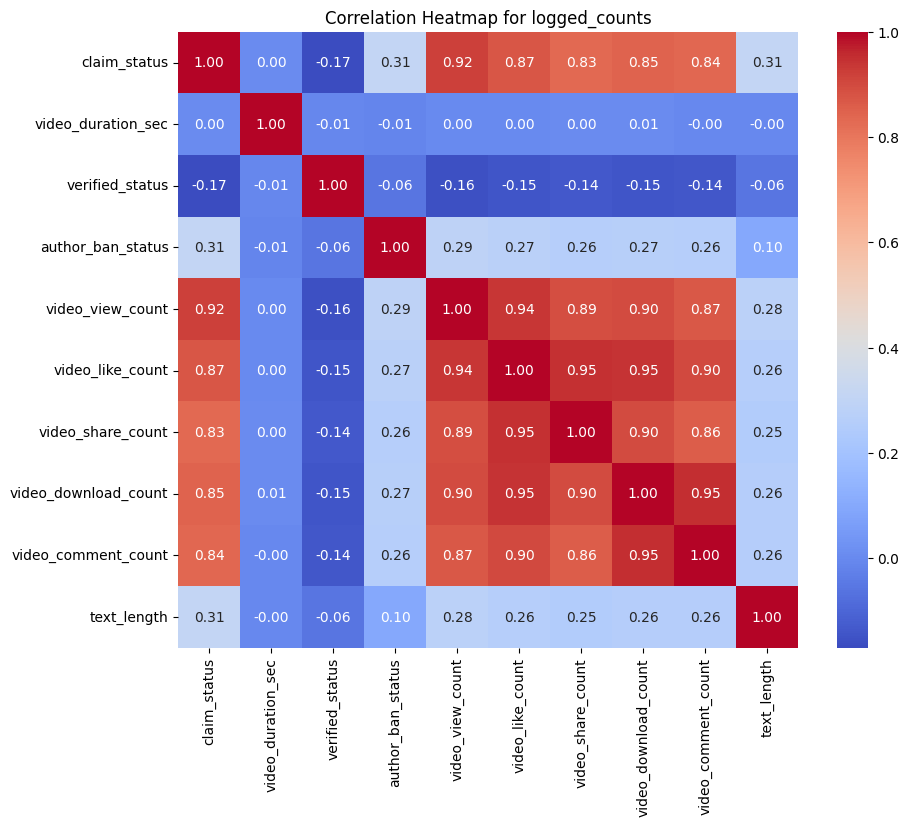

In [46]:
# prompt: plot a heatmap for corr_log

plt.figure(figsize=(10, 8))
sns.heatmap(corr_log, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for logged_counts')
plt.show()



### **Task 3a. Select variables**

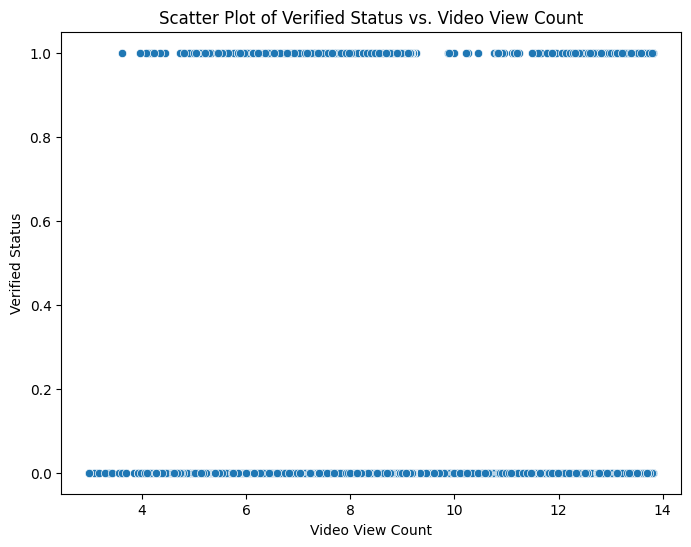

In [48]:
# prompt: plot a scatter plot with y-axis for "verified_status" and x-axis for "video_view_count"

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='video_view_count', y='verified_status')
plt.title('Scatter Plot of Verified Status vs. Video View Count')
plt.xlabel('Video View Count')
plt.ylabel('Verified Status')
plt.show()


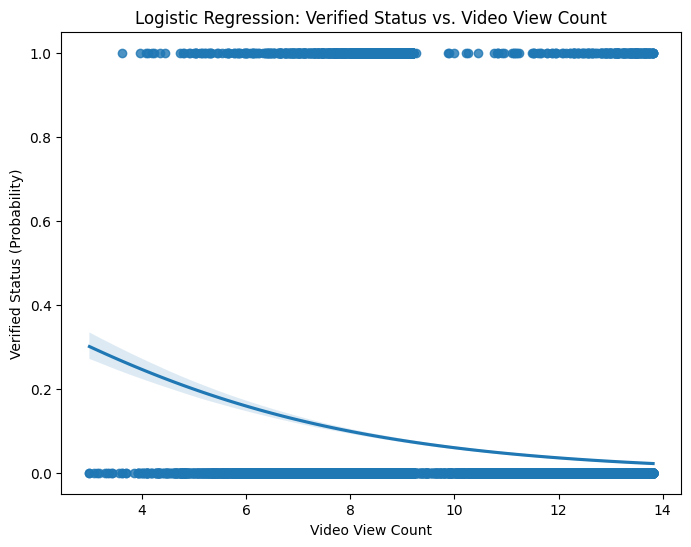

In [49]:
# prompt: create a regplot with x= 'video_view_count' and y='verified_status'; both columns in data. logistic=True.

# Create regplot
plt.figure(figsize=(8, 6))
sns.regplot(x='video_view_count', y='verified_status', data=data, logistic=True)
plt.title('Logistic Regression: Verified Status vs. Video View Count')
plt.xlabel('Video View Count')
plt.ylabel('Verified Status (Probability)')
plt.show()


In [64]:
data['verified_status'].value_counts(normalize=True)

,proportion
verified_status,
0.0,0.93712
1.0,0.06288


In [50]:
# prompt: put column "video_view_count" into a dataframe X, and column "verified_status" into a dataframe y

# Select outcome variable
y = data[['verified_status']]

# Select features
X = data[['video_view_count']]


In [51]:
# prompt: show the data type of X and y

print(type(X))
print(type(y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [52]:
# prompt: Split the X and y into training and testing sets with 30% split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


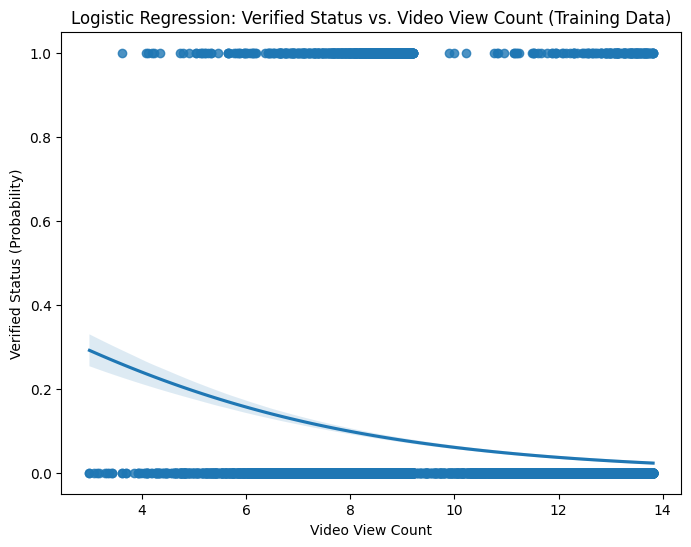

In [53]:
# prompt: create a regplot with x= X_train and y=y_train. logistic=True.

# Create regplot
plt.figure(figsize=(8, 6))
sns.regplot(x=X_train, y=y_train, data=data, logistic=True)
plt.title('Logistic Regression: Verified Status vs. Video View Count (Training Data)')
plt.xlabel('Video View Count')
plt.ylabel('Verified Status (Probability)')
plt.show()


In [54]:
# prompt: Build a logistic regression model and fit the model to the training data: X_train and y_train

# Build a logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train.values.ravel())


LogisticRegression()

In [55]:
# prompt: display parameters, coef_ and intercept_ of model log_reg

# Display model parameters
print("Parameters:", log_reg.get_params())

# Display coefficient and intercept
print("Coefficient:", log_reg.coef_)
print("Intercept:", log_reg.intercept_)


Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Coefficient: [[-0.26475602]]
Intercept: [-0.09619529]


In [56]:
# prompt: use model log_reg to predict y_train_pred with X_train

# Predict on the training data
y_train_pred = log_reg.predict(X_train)


In [57]:
# prompt: use model log_reg with X_train to predict probabilities

# Predict probabilities on the training data
y_train_pred_proba = log_reg.predict_proba(X_train)


In [58]:
# prompt: get the size of y_train_pred_proba

# Get the size of y_train_pred_proba
y_train_pred_proba.shape


(13358, 2)

In [59]:
# prompt: do a describe for y_train_pred_proba[:, 1]

pd.DataFrame(y_train_pred_proba[:, 1]).describe()


,0
count,13358.000000
mean,0.063407
std,0.038799
min,0.022890
25%,0.027371
50%,0.073474
75%,0.087463
max,0.291247


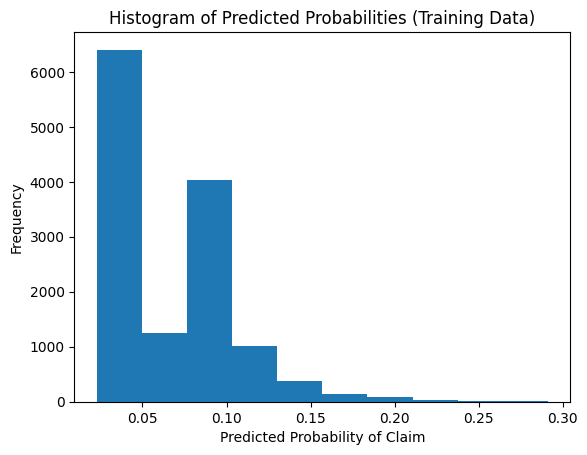

In [60]:
# prompt: plot a histogram for y_train_pred_proba

# Plot histogram of predicted probabilities
plt.hist(y_train_pred_proba[:, 1], bins=10)
plt.title('Histogram of Predicted Probabilities (Training Data)')
plt.xlabel('Predicted Probability of Claim')
plt.ylabel('Frequency')
plt.show()


In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13358 entries, 9356 to 2732
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_view_count  13358 non-null  float64
dtypes: float64(1)
memory usage: 208.7 KB


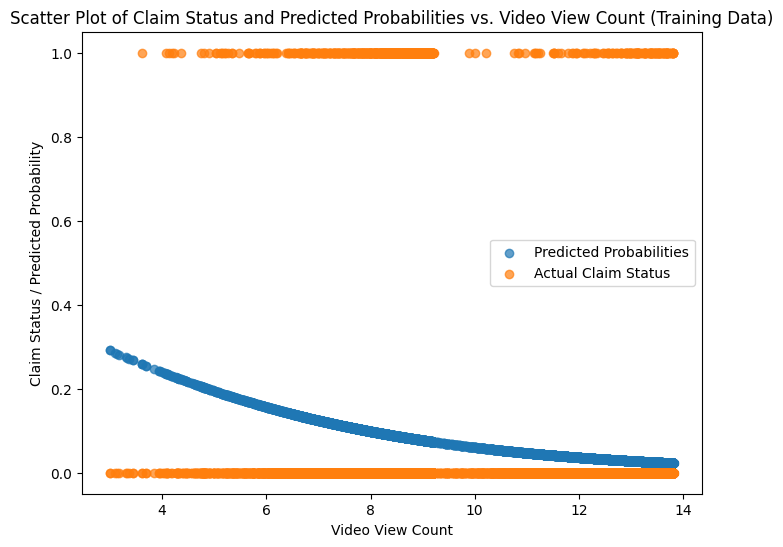

In [62]:
# prompt: plot a scatterplot with x=X_train['video_view_count'] and y=y_train_pred_proba[:, 1]. Also plot the scatterplot of x=X_train['video_view_count'] and y=y_train on the same plot with a different color.

# Plot scatterplots
plt.figure(figsize=(8, 6))

# Scatter plot of predicted probabilities
plt.scatter(X_train['video_view_count'], y_train_pred_proba[:, 1], label='Predicted Probabilities', alpha=0.7)

# Scatter plot of actual claim status
plt.scatter(X_train['video_view_count'], y_train, label='Actual Claim Status', alpha=0.7)

plt.title('Scatter Plot of Claim Status and Predicted Probabilities vs. Video View Count (Training Data)')
plt.xlabel('Video View Count')
plt.ylabel('Claim Status / Predicted Probability')
plt.legend()
plt.show()


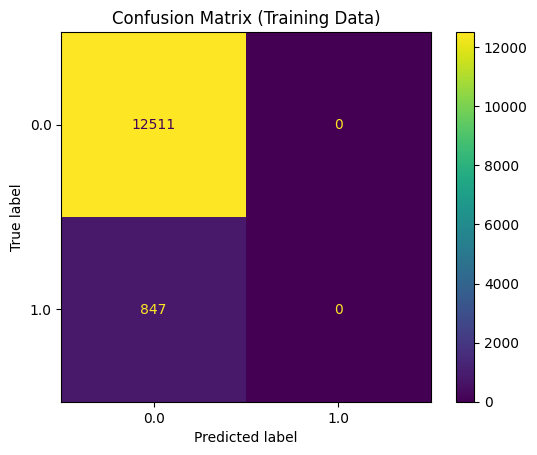

In [63]:
# prompt: plot a confusion matrix with y_train and y_train_pred

# Generate confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.title('Confusion Matrix (Training Data)')
plt.show()


In [ ]:
# prompt: create a function that has an argument "threshold". This function use the threshold to compare with y_train_pred_proba[:, 1] to produce y_pred: if a value from y_train_pred_proba[:, 1] <= threshold, y_pred = 0, otherwise 1. The function returns y_pred

def predict_with_threshold(y_train_pred_proba, threshold):
  """
  Predicts class labels based on predicted probabilities and a given threshold.

  Args:
    y_train_pred_proba: NumPy array of predicted probabilities, shape (n_samples, 2).
    threshold: Threshold value for classification.

  Returns:
    NumPy array of predicted class labels, shape (n_samples,).
  """
  y_pred = (y_train_pred_proba[:, 1] > threshold).astype(int)
  return y_pred


In [ ]:
y_pred_temp = predict_with_threshold(y_train_pred_proba, 0.5)


In [ ]:
# prompt: get unique values of  y_pred_temp - y_train_pred

np.unique(y_pred_temp - y_train_pred)


array([0.])

In [ ]:
y_pred_0_51 = predict_with_threshold(y_train_pred_proba, 0.51)

In [ ]:
y_pred_0_6 = predict_with_threshold(y_train_pred_proba, 0.6)

In [ ]:
y_pred_0_56 = predict_with_threshold(y_train_pred_proba, 0.56)

In [ ]:
y_pred_best = predict_with_threshold(y_train_pred_proba, 0.5457)

In [ ]:
# prompt: get unique values of y_train_pred

np.unique(y_train_pred)


array([1.])

In [ ]:
np.unique(y_pred_0_51)

array([0, 1])

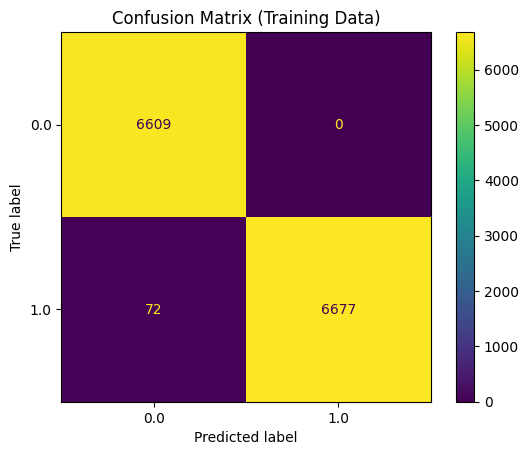

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_train, y_pred_best)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.title('Confusion Matrix (Training Data)')
plt.show()

In [ ]:
# prompt: display cm

# Display cm
print(cm)


[[6401  208]
 [  71 6678]]


In [ ]:
# prompt: display the upper-right and lower-left elements of cm

# Display upper-right element of cm
print(cm[0, 1])

# Display lower-left element of cm
print(cm[1, 0])


208
71


In [ ]:
# prompt: implement am optimization function to find the best threshold value which minimize the sum of cm[0,1] and cm[1,0]. The cm in computed from y_train and predict_with_threshold(y_train_pred_proba, threshold)

def find_best_threshold(y_true, y_pred_proba):
  """
  Finds the best threshold for classification that minimizes the sum of
  false positives and false negatives.

  Args:
    y_true: NumPy array of true class labels, shape (n_samples,).
    y_pred_proba: NumPy array of predicted probabilities, shape (n_samples, 2).

  Returns:
    The best threshold value.
  """
  best_threshold = 0
  best_score = float('inf')

  for threshold in np.arange(0.5, 0.6, 0.0001):
    y_pred = predict_with_threshold(y_pred_proba, threshold)
    cm = confusion_matrix(y_true, y_pred)
    score = cm[0, 1] + cm[1, 0]  # Sum of false positives and false negatives
    if score < best_score:
      best_score = score
      best_threshold = threshold

  return best_threshold

# Find the best threshold
best_threshold = find_best_threshold(y_train, y_train_pred_proba)
print("Best Threshold:", best_threshold)


Best Threshold: 0.545699999999995


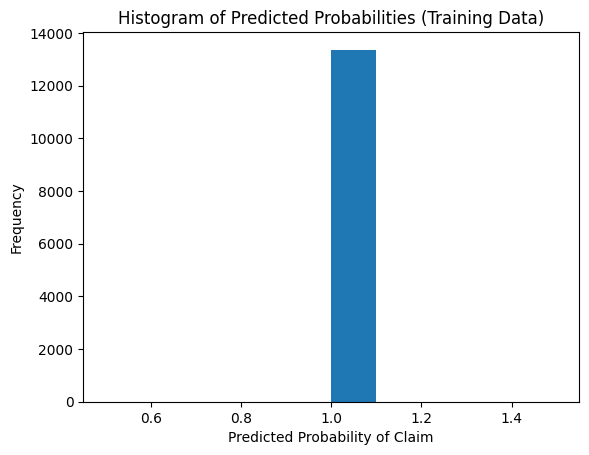

In [ ]:
# prompt: plot histogram for y_train_pred

# Plot histogram of predicted probabilities
plt.hist(y_train_pred, bins=10)
plt.xlabel('Predicted Probability of Claim')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities (Training Data)')
plt.show()


In [ ]:
# prompt: display unique values of y_train_pred

# Display unique predicted probabilities
print(np.unique(y_train_pred))


[1.]


In [ ]:
# prompt: use model log_reg to predict y_pred with X_test

# Predict on the test set
y_pred = log_reg.predict(X_test)


In [ ]:
# prompt: display y_pred

# Display predictions
print(y_pred)


[1. 1. 1. ... 1. 1. 1.]


In [ ]:
print(y_test)

       claim_status
3695            1.0
11495           0.0
7604            1.0
12728           0.0
875             1.0
...             ...
9386            1.0
242             1.0
14796           0.0
5609            1.0
11640           0.0

[5726 rows x 1 columns]


In [ ]:
# prompt: display value counts for y_pred

pd.Series(y_pred).value_counts()


,count
1.0,5726


In [ ]:
# prompt: display values counts for y_test

y_test.value_counts()


,count
claim_status,
0.0,2867
1.0,2859


In [ ]:
# prompt: display value counts for y_train

y_train.value_counts()


,count
claim_status,
1.0,6749
0.0,6609


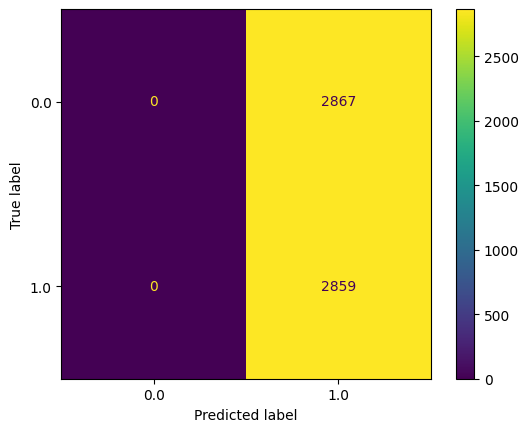

In [ ]:
# prompt: plot a confusion matrix with y_test and y_pred

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.show()


In [ ]:
# prompt: display the size of y_test

# Display the size of y_test
print("Size of y_test:", y_test.size)


Size of y_test: 5726


Set your Y and X variables.

Select the outcome variable.

In [ ]:
# Select outcome variable
### YOUR CODE HERE ###
y = data_upsampled[['verified_status']]

Select the features.

In [ ]:
# Select features
### YOUR CODE HERE ###
X = data_upsampled[['claim_status', 'author_ban_status', 'video_duration_sec', 'text_length']]

# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,claim_status,author_ban_status,video_duration_sec,text_length
0,claim,under review,59,97
1,claim,active,32,107
2,claim,active,31,137
3,claim,active,25,131
4,claim,active,19,128


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [ ]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [ ]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25192, 4) (8398, 4) (25192, 1) (8398, 1)


### **Task 3c. Encode variables**

Check the data types of the features.

In [ ]:
# Check data types
### YOUR CODE HERE ###
X_train.dtypes

,0
claim_status,object
author_ban_status,object
video_duration_sec,int64
text_length,int64


In [ ]:
# Get unique values in `claim_status`
### YOUR CODE HERE ###
X_train['claim_status'].unique()


array(['opinion', 'claim'], dtype=object)

In [ ]:
# Get unique values in `author_ban_status`
### YOUR CODE HERE ###
X_train['author_ban_status'].unique()

array(['active', 'under review', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [ ]:
# Select the training features that needs to be encoded
### YOUR CODE HERE ###
X_train_to_encode = X_train[['claim_status', 'author_ban_status']]

# Display first few rows
### YOUR CODE HERE ###
X_train_to_encode.head()

,claim_status,author_ban_status
17982,opinion,active
7596,claim,active
5172,claim,active
12539,opinion,active
15369,opinion,active


In [ ]:
# Set up an encoder for one-hot encoding the categorical features
### YOUR CODE HERE ###
#encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')
encoder = preprocessing.OneHotEncoder(drop='first', sparse=False)

In [ ]:
# Fit and transform the training features using the encoder
### YOUR CODE HERE ###
X_train_encoded = encoder.fit_transform(X_train_to_encode)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Get feature names from encoder
### YOUR CODE HERE ###
encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [ ]:
# Display first few rows of encoded training features
### YOUR CODE HERE ###
X_train_encoded[:5,:]

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
# Place encoded training features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=encoder.get_feature_names_out())

# Display first few rows
### YOUR CODE HERE ###
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
X_train.drop(columns=['claim_status', 'author_ban_status']).head()

,video_duration_sec,text_length
17982,42,82
7596,41,112
5172,51,68
12539,41,70
15369,52,60


In [ ]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
### YOUR CODE HERE ###
X_train_final = pd.concat([X_train.drop(columns=['claim_status', 'author_ban_status']).reset_index(drop=True), X_train_encoded_df], axis=1)
# Display first few rows
### YOUR CODE HERE ###
X_train_final.head()

,video_duration_sec,text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,42,82,1.0,0.0,0.0
1,41,112,0.0,0.0,0.0
2,51,68,0.0,0.0,0.0
3,41,70,1.0,0.0,0.0
4,52,60,1.0,0.0,0.0


Check the data type of the outcome variable.

In [ ]:
# Check data type of outcome variable
### YOUR CODE HERE ###
y_train.dtypes

,0
verified_status,object


In [ ]:
# Get unique values of outcome variable
### YOUR CODE HERE ###
y_train['verified_status'].unique()

array(['not verified', 'verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [ ]:
# Set up an encoder for one-hot encoding the categorical outcome variable
### YOUR CODE HERE ###
#encoder_y = preprocessing.OneHotEncoder(handle_unknown='ignore')
encoder_y = preprocessing.OneHotEncoder(drop='first', sparse=False)

In [ ]:
# EXTRA
y_train.head()

,verified_status
17982,not verified
7596,not verified
5172,not verified
12539,verified
15369,verified


In [ ]:
# EXTRA
y_train.tail()

,verified_status
17426,verified
241,verified
16218,verified
15323,verified
3184,not verified


In [ ]:
# prompt: Encode the training outcome variable.

# Fit and transform the training outcome variable using the encoder
#encoder_y.fit(y_train)
#y_train_encoded = encoder_y.transform(y_train).toarray()
#y_train_encoded


In [ ]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
### YOUR CODE HERE ###
encoder_y.fit(y_train.values.reshape(-1, 1))
#y_train_encoded = encoder_y.transform(y_train).toarray()
y_train_encoded = encoder_y.transform(y_train).ravel()

# Display the encoded training outcome variable
### YOUR CODE HERE ###
y_train_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


array([0., 0., 0., ..., 1., 1., 0.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [ ]:
# prompt: Construct a model and fit it to the training set

# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###
#log_reg = LogisticRegression(random_state=0, max_iter=800)
#log_reg.fit(X_train_final, y_train_encoded)


In [ ]:
# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###
log_reg = LogisticRegression(random_state=0, max_iter=800)
log_reg.fit(X_train_final, y_train_encoded)


LogisticRegression(max_iter=800, random_state=0)

<img src="https://drive.google.com/uc?id=1O04Ts47cyQs_UPSPtJxUXGEKsSpteLRL" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [ ]:
# Select the testing features that needs to be encoded
### YOUR CODE HERE ###
X_test_to_encode = X_test[['claim_status', 'author_ban_status']]

# Display first few rows
### YOUR CODE HERE ###
X_test_to_encode.head()

,claim_status,author_ban_status
12052,opinion,active
17862,opinion,active
18053,opinion,active
11844,opinion,active
4630,claim,active


In [ ]:
# Transform the testing features using the encoder
### YOUR CODE HERE ###
#X_test_encoded = encoder.transform(X_test_to_encode).toarray()
X_test_encoded = encoder.transform(X_test_to_encode)
display(encoder.get_feature_names_out())

# Display first few rows of encoded testing features
### YOUR CODE HERE ###
X_test_encoded[:5,:]

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [ ]:
# Place encoded testing features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=encoder.get_feature_names_out())

# Display first few rows
### YOUR CODE HERE ###
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0


In [ ]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
X_test.drop(columns=['claim_status', 'author_ban_status']).head()

,video_duration_sec,text_length
12052,13,56
17862,15,71
18053,53,142
11844,41,69
4630,22,129


In [ ]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
### YOUR CODE HERE ###
X_test_final = pd.concat([X_test.drop(columns=['claim_status', 'author_ban_status']).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
### YOUR CODE HERE ###
X_test_final.head()

,video_duration_sec,text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,13,56,1.0,0.0,0.0
1,15,71,1.0,0.0,0.0
2,53,142,1.0,0.0,0.0
3,41,69,1.0,0.0,0.0
4,22,129,0.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [ ]:
# Use the logistic regression model to get predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred = log_reg.predict(X_test_final)

Display the predictions on the encoded testing set.

In [ ]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred

array([1., 1., 1., ..., 0., 1., 0.])

Display the true labels of the testing set.

In [ ]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
y_test

,verified_status
12052,verified
17862,verified
18053,verified
11844,not verified
4630,not verified
...,...
18484,verified
1286,verified
7919,verified
14578,not verified


Encode the true labels of the testing set so it can be compared to the predictions.

In [ ]:
# prompt: Encode the testing outcome variable

# Encode the testing outcome variable
#y_test_encoded = encoder_y.transform(y_test).toarray()

# Display the encoded testing outcome variable
#y_test_encoded


In [ ]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
### YOUR CODE HERE ###
#y_test_encoded = encoder_y.transform(y_test).toarray()
y_test_encoded = encoder_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_encoded

array([1., 1., 1., ..., 1., 0., 0.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [ ]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
print(X_train_final.shape, X_test_final.shape, y_train_encoded.shape, y_test_encoded.shape)

(25192, 5) (8398, 5) (25192,) (8398,)


### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

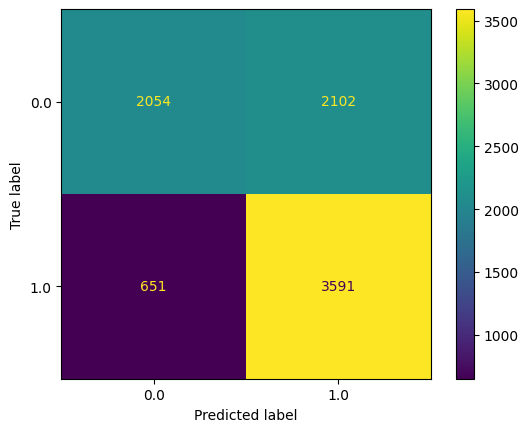

In [ ]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_test_encoded, y_pred, labels=log_reg.classes_)

# Create display of confusion matrix
### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()

# Display plot
### YOUR CODE HERE ###
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [ ]:
# Create a classification report
### YOUR CODE HERE ###
target_names = ['not verified', 'verified']
print(classification_report(y_test_encoded, y_pred, target_names=target_names))

              precision    recall  f1-score   support

not verified       0.76      0.49      0.60      4156
    verified       0.63      0.85      0.72      4242

    accuracy                           0.67      8398
   macro avg       0.70      0.67      0.66      8398
weighted avg       0.69      0.67      0.66      8398



### **Task 4c. Interpret model coefficients**

In [ ]:
# prompt: Get the feature names from the model and the model coefficients (which represent log-odds ratios). Place into a DataFrame for readability.

# Get the feature names from the model
#feature_names = X_train_final.columns

# Get the coefficients (log-odds ratios) from the model
#coefficients = log_reg.coef_.ravel()

# Create a DataFrame for readability
#coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
#coefficients_df


In [ ]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
### YOUR CODE HERE ###
# Get the feature names from the model
feature_names = X_train_final.columns

# Get the coefficients (log-odds ratios) from the model
coefficients = log_reg.coef_.ravel()

# Create a DataFrame for readability
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df

,Feature,Coefficient
0,video_duration_sec,-0.001540
1,text_length,-0.000889
2,claim_status_opinion,1.539811
3,author_ban_status_banned,-0.423364
4,author_ban_status_under review,-0.191874


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

==> ENTER YOUR RESPONSE TO QUESTIONS 1 AND 2 HERE

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.